In [20]:
from HeaderP import *
import Astraea

Read in kepler and train model

Kepler Prot

In [47]:
Prots=pd.read_pickle('Data/Mc_Gar_Sant')
print(np.shape(Prots))

(38573, 169)


In [48]:
mcq_T1=pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_1_Periodic.txt',delimiter=',')
mcq_T2=pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_2_Non_Periodic.txt',delimiter=',')
frames = [mcq_T1, mcq_T2]
kepler=result = pd.concat(frames)
kepler=kepler.dropna(subset=['Prot'])
kepler=kepler.loc[kepler['w']>0.15].reset_index(drop=True)
gaia=pd.read_pickle('Data/gaia.pkl')
kepler=pd.merge(kepler,gaia,left_on='KID',right_on='kepid',how='inner')
kepler=kepler.drop_duplicates(keep='first')
print(np.shape(kepler))

(43809, 145)


In [49]:
frames = [Prots.loc[~Prots['KID'].isin(kepler['KID'])], kepler]
kepler=result = pd.concat(frames)
kepler=kepler.dropna(subset=['Prot']).drop_duplicates(keep='first')
print(np.shape(kepler))
#kepler.to_pickle('Data/keplerProt.pkl')

(47546, 169)


GALAH data

In [24]:
galah=pd.read_pickle('Data/gala_gaia_cm.pkl')
print(np.shape(galah))

(577362, 264)


In [25]:
galah['bp_rp']=galah['bp_rp_x']
galah['parallax']=galah['parallax_x']
galah['parallax_error']=galah['parallax_error_x']
galah['phot_g_mean_mag']=galah['phot_g_mean_mag_x']
galah['ruwe']=galah['ruwe_x']
galah['pmra']=galah['pmra_x']
galah['pmdec']=galah['pmdec_x']


In [152]:
list(galah.columns)

['star_id',
 'sobject_id',
 'source_id_x',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'flag_Ti_fe',
 'Ti2_fe',
 'e_Ti2_fe',
 'nr_Ti2_fe',
 'flag_Ti2_fe',
 'V_fe',
 '

## Train Astraea with Kepler and gaia

In [26]:
"""
features=['radius_val','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error',
          'bp_g','bp_rp','ra','ra_error','dec','dec_error','lum_val',
          'teff','teff_err1','teff_err2','phot_g_mean_mag','phot_g_mean_flux_error']
"""
features=['phot_g_mean_flux_error','bp_rp','parallax','parallax_error','phot_g_mean_mag','pmra',
         'pmdec']

kepler=kepler[np.append(features,['Prot'])].dropna()
print(np.shape(kepler))

(45541, 8)


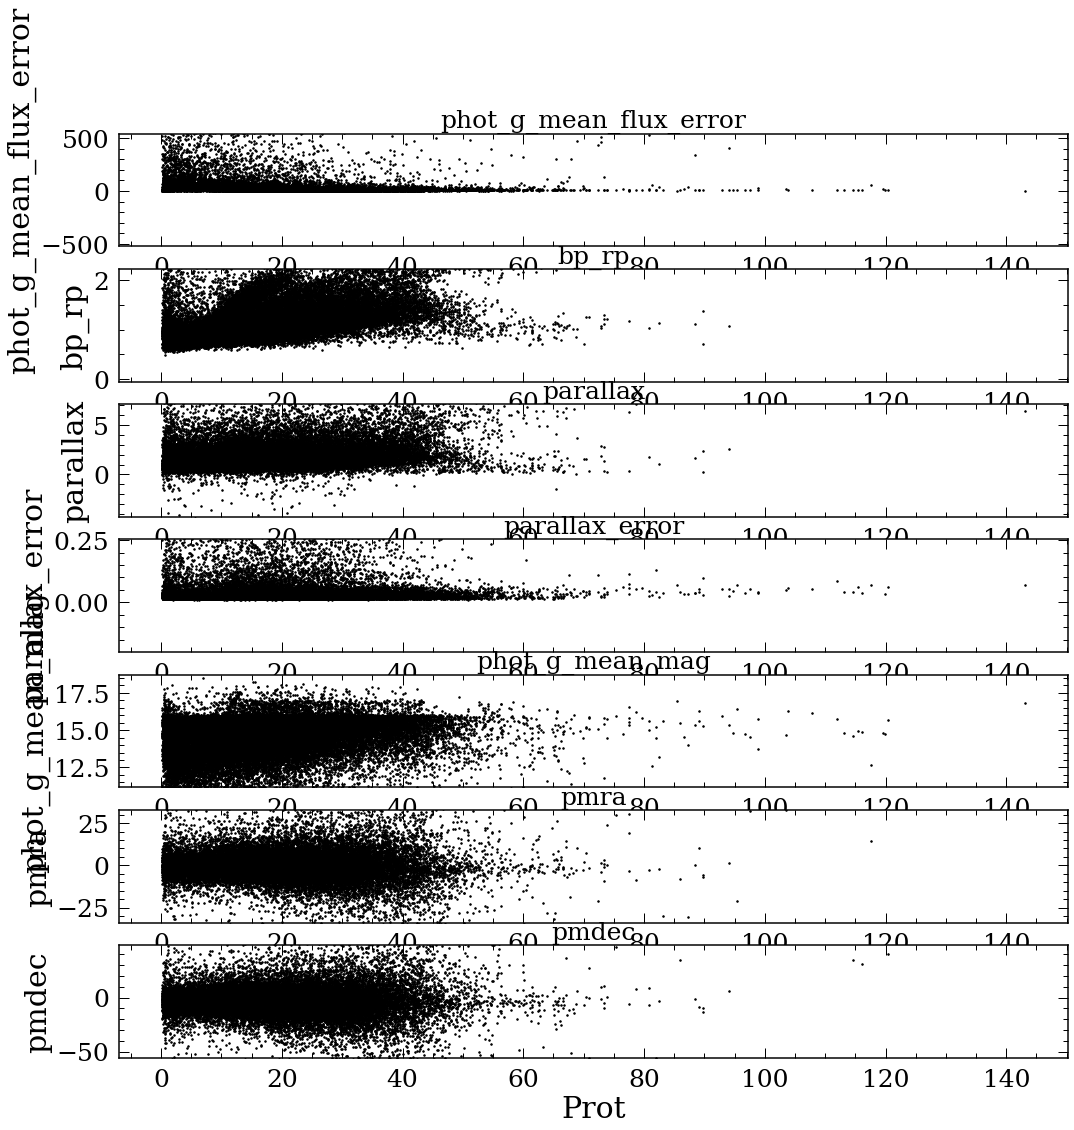

In [27]:
Astraea.plot_corr(Prots,features,MS=3)


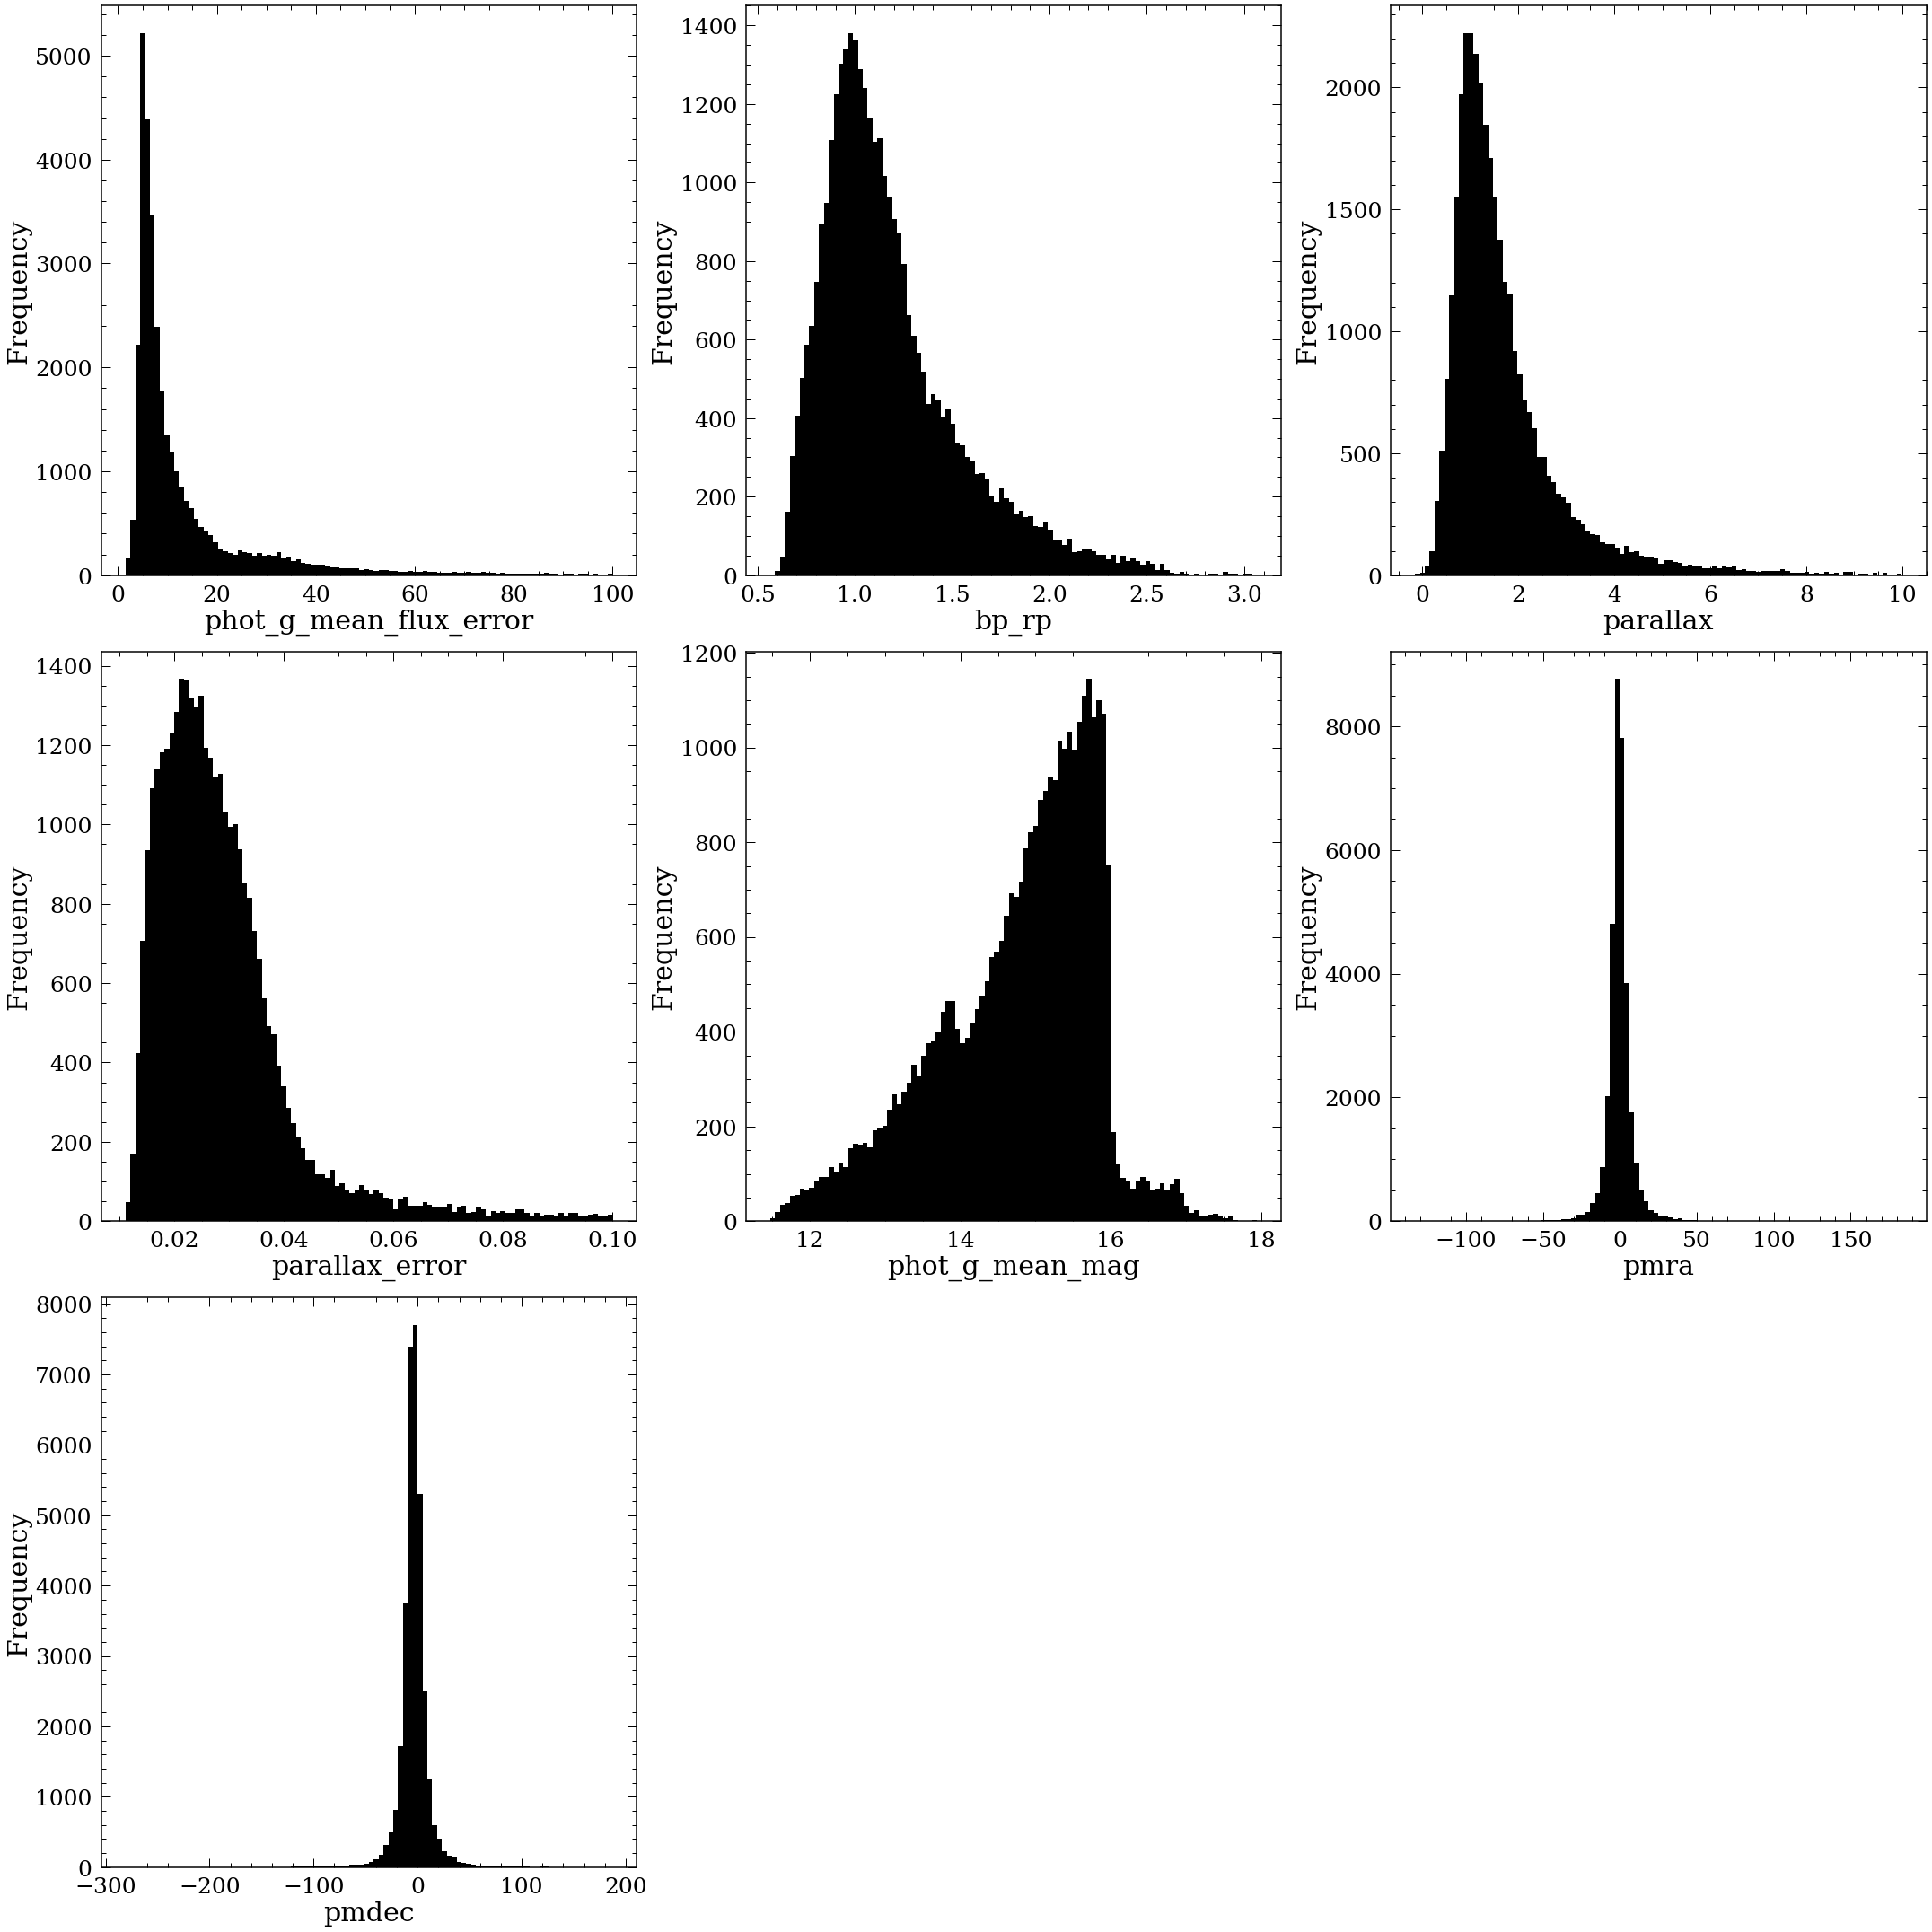

In [105]:
Prots=Prots.loc[Prots['parallax']<10].reset_index(drop=True)
Prots=Prots.loc[Prots['parallax_error']<0.1].reset_index(drop=True)

Prots=Prots.loc[Prots['phot_g_mean_flux_error']<100].reset_index(drop=True)

titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)+1):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100)
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()


In [29]:
regr, regr_outs = Astraea.RFregressor(Prots, features,
                                      target_var='Prot', target_var_err='Prot_err', n_estimators=100)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 7
Features attempt to train: ['phot_g_mean_flux_error', 'bp_rp', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'pmra', 'pmdec']
33773 stars in dataframe!
Missing 39 stars from null values in data!

33734 total stars used for RF!
26987 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.24037195709243442
Average chi^2 is: 1975.8955640849772
Finished!


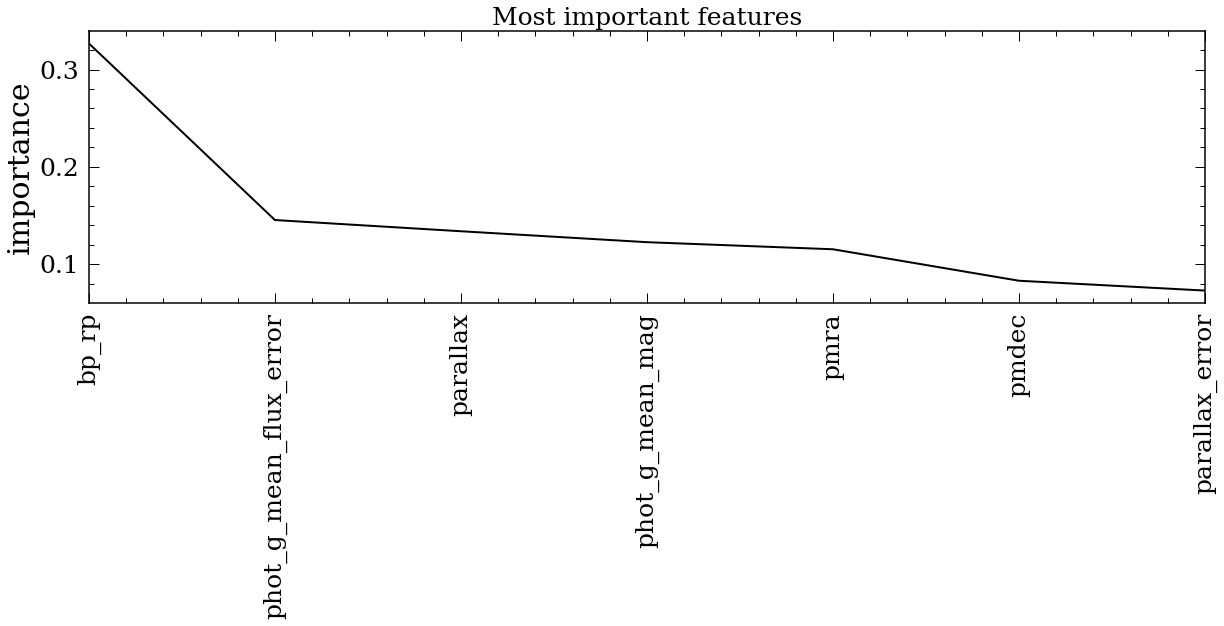

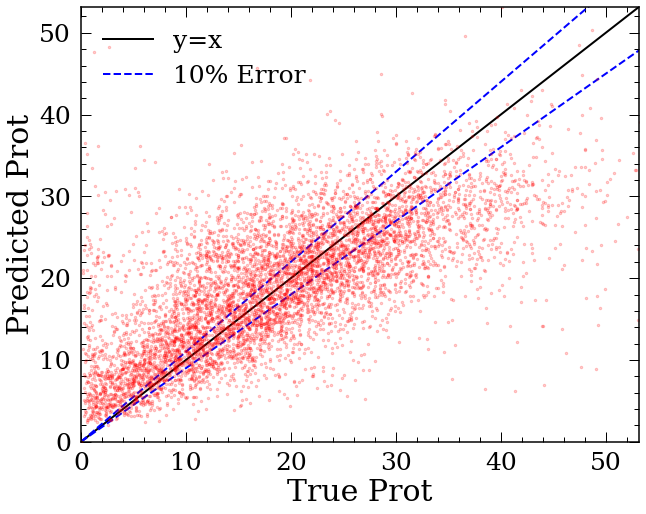

In [30]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Prot', MS=5)

In [31]:
gaia_feat=gaia[regr_outs['actrualF']].dropna().reset_index(drop=True)
print(np.shape(gaia_feat))

(194932, 7)


In [32]:
#gaia_feat["abs_G"] = m_to_M(gaia_feat.phot_g_mean_mag.values, 1./gaia_feat.parallax.values)

In [33]:
#gaia_feat=gaia_feat.loc[gaia_feat['abs_G']>4]

(166640, 7)


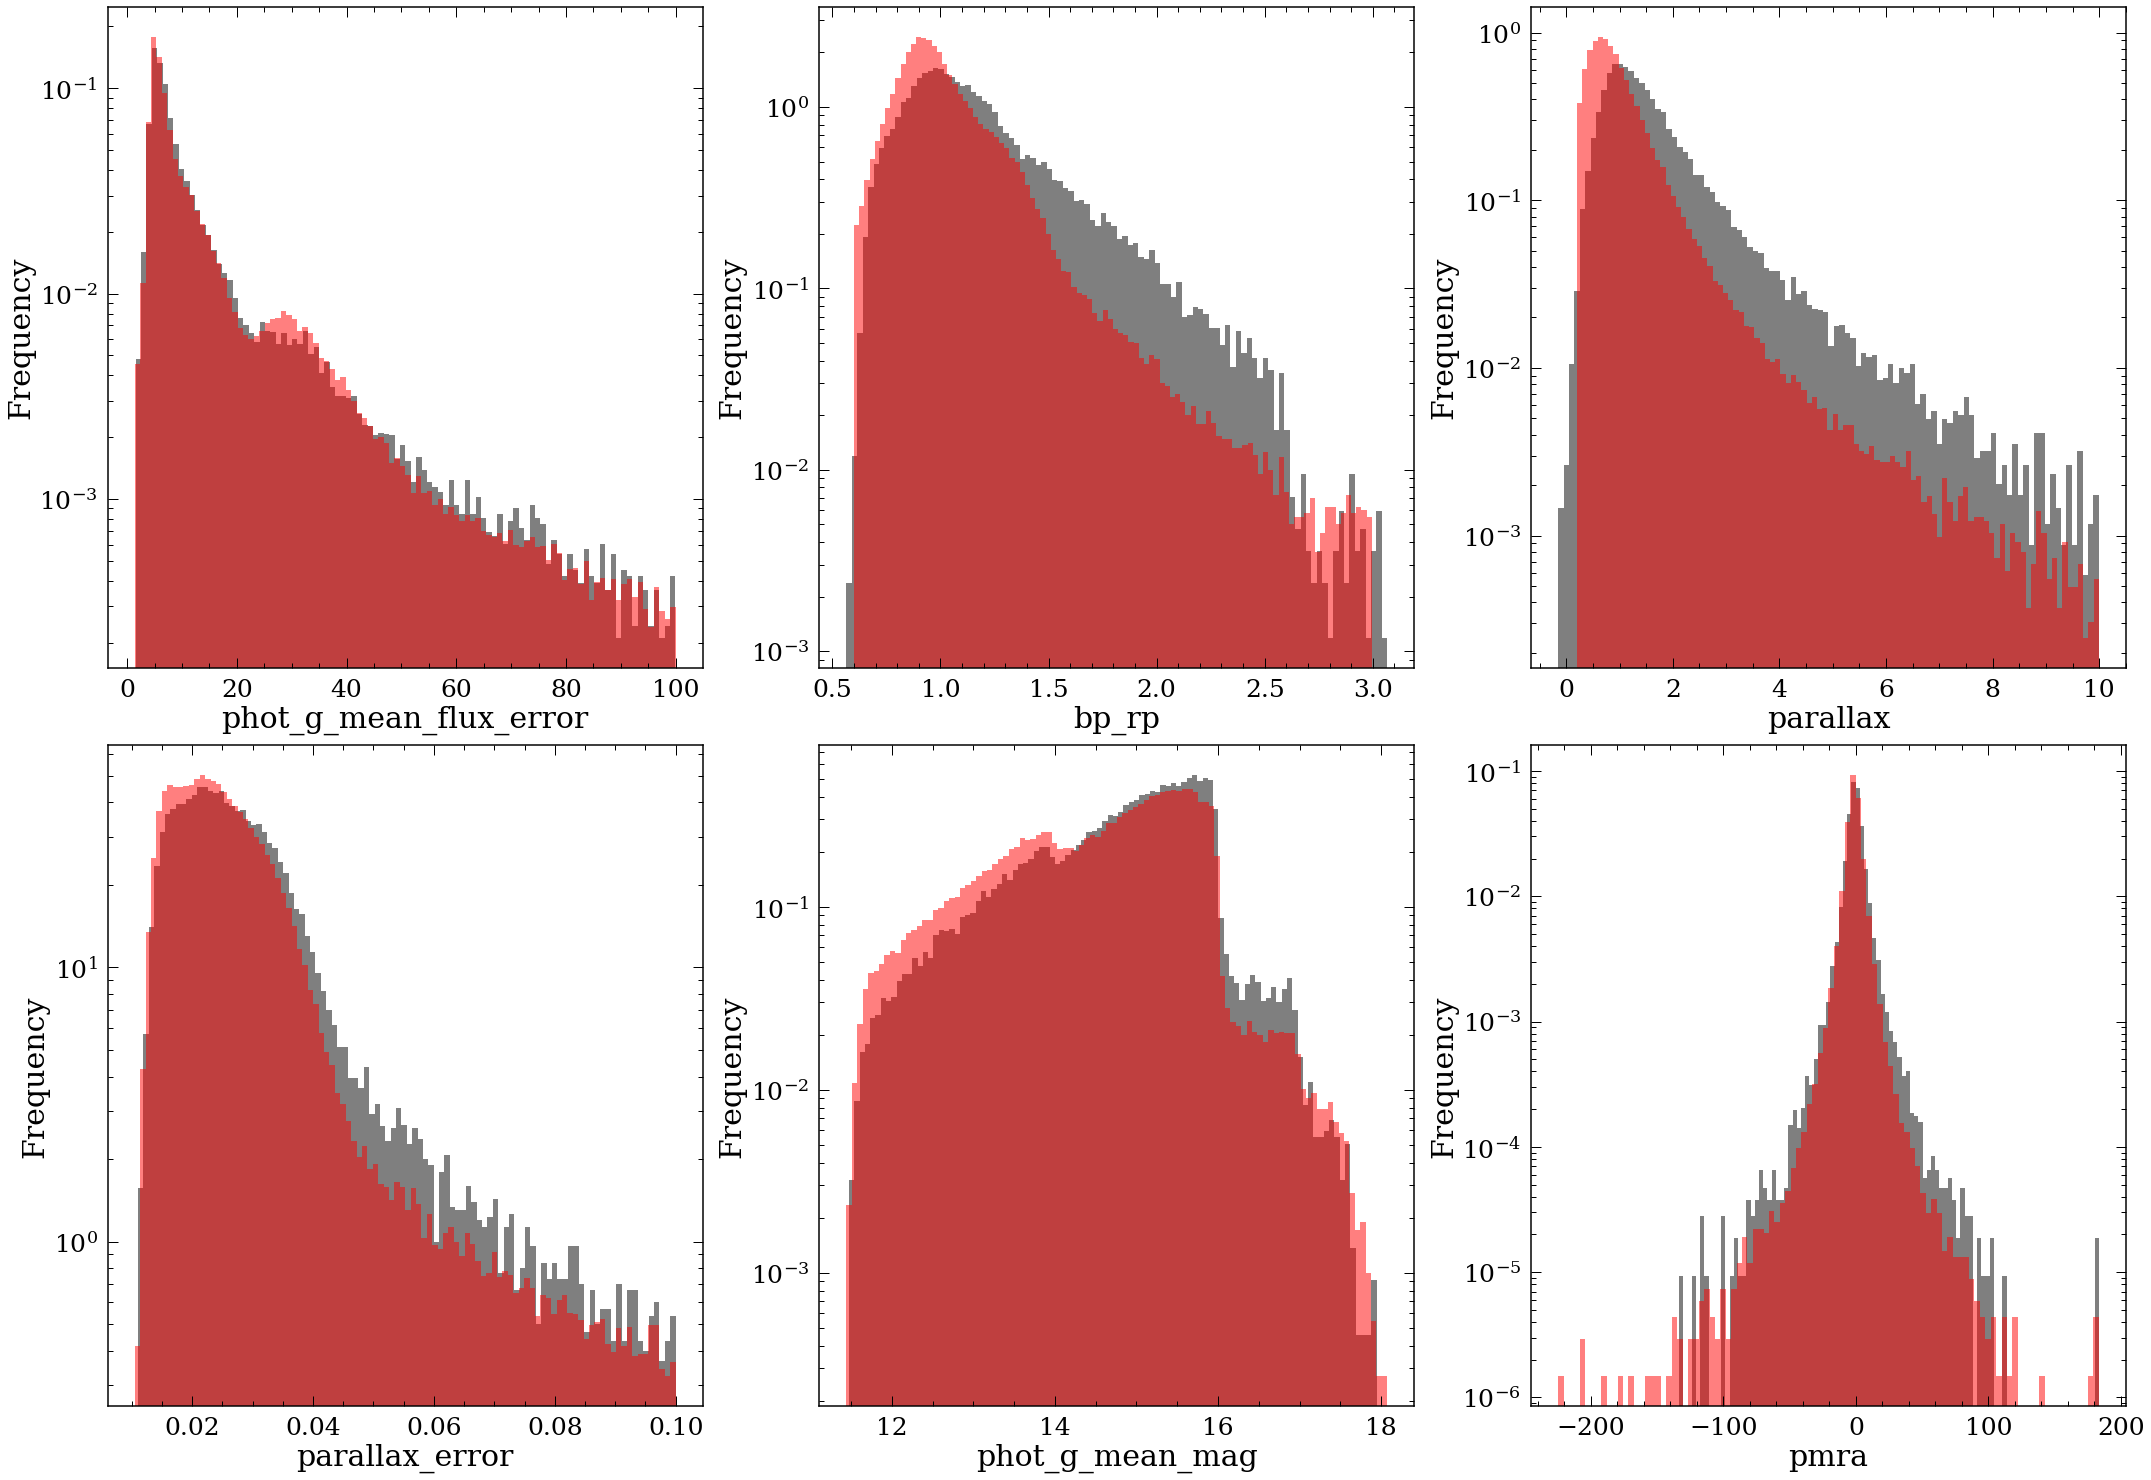

In [34]:
gaia_feat=gaia_feat.loc[gaia_feat['parallax']<10].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['parallax']>0.2].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['parallax_error']<0.1].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_mag']>8].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_mag']<19].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['bp_rp']>0.6].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['bp_rp']<3].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_flux_error']<100].reset_index(drop=True)


titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100,alpha=0.5,density=True)
    plt.hist(gaia_feat[features[i-1]],color='r',bins=100,alpha=0.5,density=True)
    plt.yscale('log')
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()

print(np.shape(gaia_feat))

In [35]:
gaia_feat['Prot_predict']=regr.predict(gaia_feat[regr_outs['actrualF']])

(0, 50)

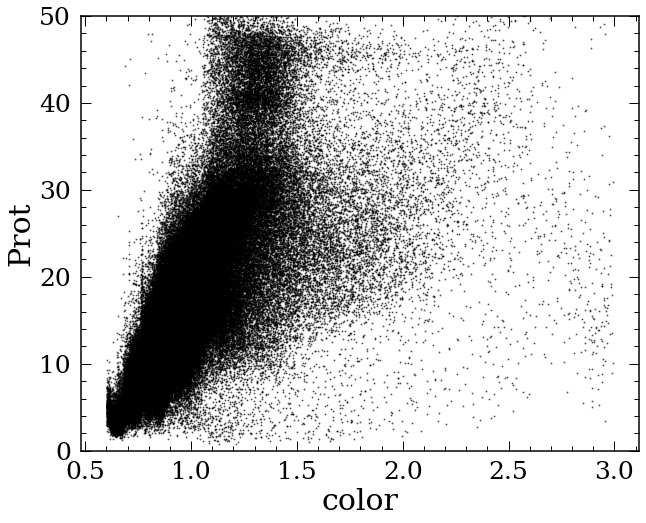

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(gaia_feat['bp_rp'],gaia_feat['Prot_predict'],s=1,alpha=0.5,c='k')
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
#plt.gca().invert_xaxis()


# Get gaia data for GALAH

In [84]:
galah=pd.read_pickle('Data/gala_gaia_cm.pkl')
print(np.shape(galah))

(577362, 264)


In [ ]:
galah['Ra']=galah['ra']
galah['Dec']=galah['dec']

In [ ]:
galah[['star_id','ra','dec']].to_csv('galahcm')

In [40]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [ ]:
Gaia.login()

In [142]:
from astropy.table import Table
starid=galah['star_id'].values
ra=galah['ra'].values
dec=galah['dec'].values

galah_astropy = Table([starid,ra,dec], names=['starid','ra','dec'], meta={'meta':'first table'})


In [146]:
table = galah_astropy

In [ ]:
Gaia.upload_table(upload_resource=table, table_name='my_sources')

In [109]:
Gaia.login_gui()

OK


In [ ]:
tables = Gaia.load_tables(only_names=True, include_shared_tables=True)

In [ ]:
Gaia.update_user_table(table_name="user_ylu.my_sources",
                       list_of_changes=[["ra","flags","Ra"],
                                        ["dec","flags","Dec"]])

In [99]:
table = Gaia.load_table('gaiadr2.gaia_source')

Retrieving table 'gaiadr2.gaia_source'
Parsing table 'gaiadr2.gaia_source'...
Done.


In [129]:
full_qualified_table_name = 'user_ylu.my_sources'

In [130]:
xmatch_table_name = 'xmatch_table_1'

In [ ]:
Gaia.cross_match(full_qualified_table_name_a=full_qualified_table_name,
                 full_qualified_table_name_b='gaiadr2.gaia_source',
                 results_table_name=xmatch_table_name, radius=1.0)

In [ ]:
xmatch_table = 'user_ylu.' + xmatch_table_name

In [ ]:
query = ('SELECT c."dist"*3600 as dist, a.*, b.* FROM gaiadr2.gaia_source AS a, '
         'full_qualified_table_name+' AS b, '
         'xmatch_table+' AS c '
         'WHERE (c.gaia_source_source_id = a.source_id AND '
         'c.my_sources_my_sources_oid = b.my_sources_oid)')

In [ ]:
job = Gaia.launch_job(query=query)

In [ ]:
results = job.get_results()

In [ ]:
print(f"results = {results}")

In [10]:
ras=galah['ra'].values
decs=galah['dec'].values

In [310]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=ras[0], dec=decs[0], unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1, u.arcsec)
height = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height).to_pandas()


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
for i in trange(1,len(ras)):
    coord = SkyCoord(ra=ras[i], dec=decs[i], unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(1, u.arcsec)
    height = u.Quantity(1, u.deg)
    Gaia.ROW_LIMIT = 1
    new=Gaia.query_object_async(coordinate=coord, width=width, height=height).to_pandas()
    print(len(new))
    r = pd.concat([r, new])
    print(len(r))
    clear_output(wait = True)



# Get gaia data for GALAH with gaiatool

In [1]:
import numpy as np
import sys; sys.path.insert(0, '../')
from gaia_tools.query import make_query, make_simple_query
import warnings; warnings.filterwarnings('ignore')

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [ ]:
circle = """
--Selections: Cluster RA
1=CONTAINS(POINT('ICRS',gaia.ra,gaia.dec),
           CIRCLE('ICRS',{ra:.4f},{dec:.4f},{rad:.2f}))
""".format(ra=230, dec=0, rad=4)

# Use it on GALAH

In [86]:
galah=pd.read_pickle('Data/gala_gaia_cm.pkl')
print(np.shape(galah))

(577362, 264)


In [94]:
galah['bp_rp']=galah['bp_rp_x']
galah['parallax']=galah['parallax_x']
galah['parallax_error']=galah['parallax_error_x']
galah['phot_g_mean_mag']=galah['phot_g_mean_mag_x']
galah['ruwe']=galah['ruwe_x']
galah['pmra']=galah['pmra_x']
galah['pmdec']=galah['pmdec_x']
galah['pmra_error']=galah['pmra_error_x']
galah['pmdec_error']=galah['pmdec_error_x']


In [95]:
features

['phot_g_mean_flux_error',
 'bp_rp',
 'parallax',
 'parallax_error',
 'phot_g_mean_mag',
 'pmra',
 'pmdec']

In [96]:
galah=galah.loc[galah['pmra_error']<0.1]
kepler=kepler.loc[kepler['pmra_error']<0.2]

galah=galah.loc[galah['pmdec_error']<0.1]
kepler=kepler.loc[kepler['pmdec_error']<0.2]

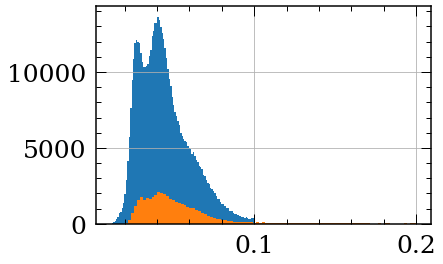

In [97]:
galah['pmdec_error'].hist(bins=100)
kepler['pmdec_error'].hist(bins=100)

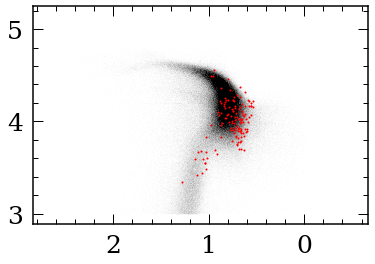

In [98]:
galah=galah.loc[galah['logg']>3].reset_index(drop=True)

plt.scatter(galah['bp_rp'],galah['logg'],c='k',s=1,alpha=0.005)
plt.scatter(kepler['bp_rp'],kepler['logg'],c='r',s=1)
plt.gca().invert_xaxis()

get gaia data for galah

In [103]:
galah_feat=galah.dropna(subset=regr_outs['actrualF']).reset_index(drop=True)
print(np.shape(galah_feat))

(372516, 273)


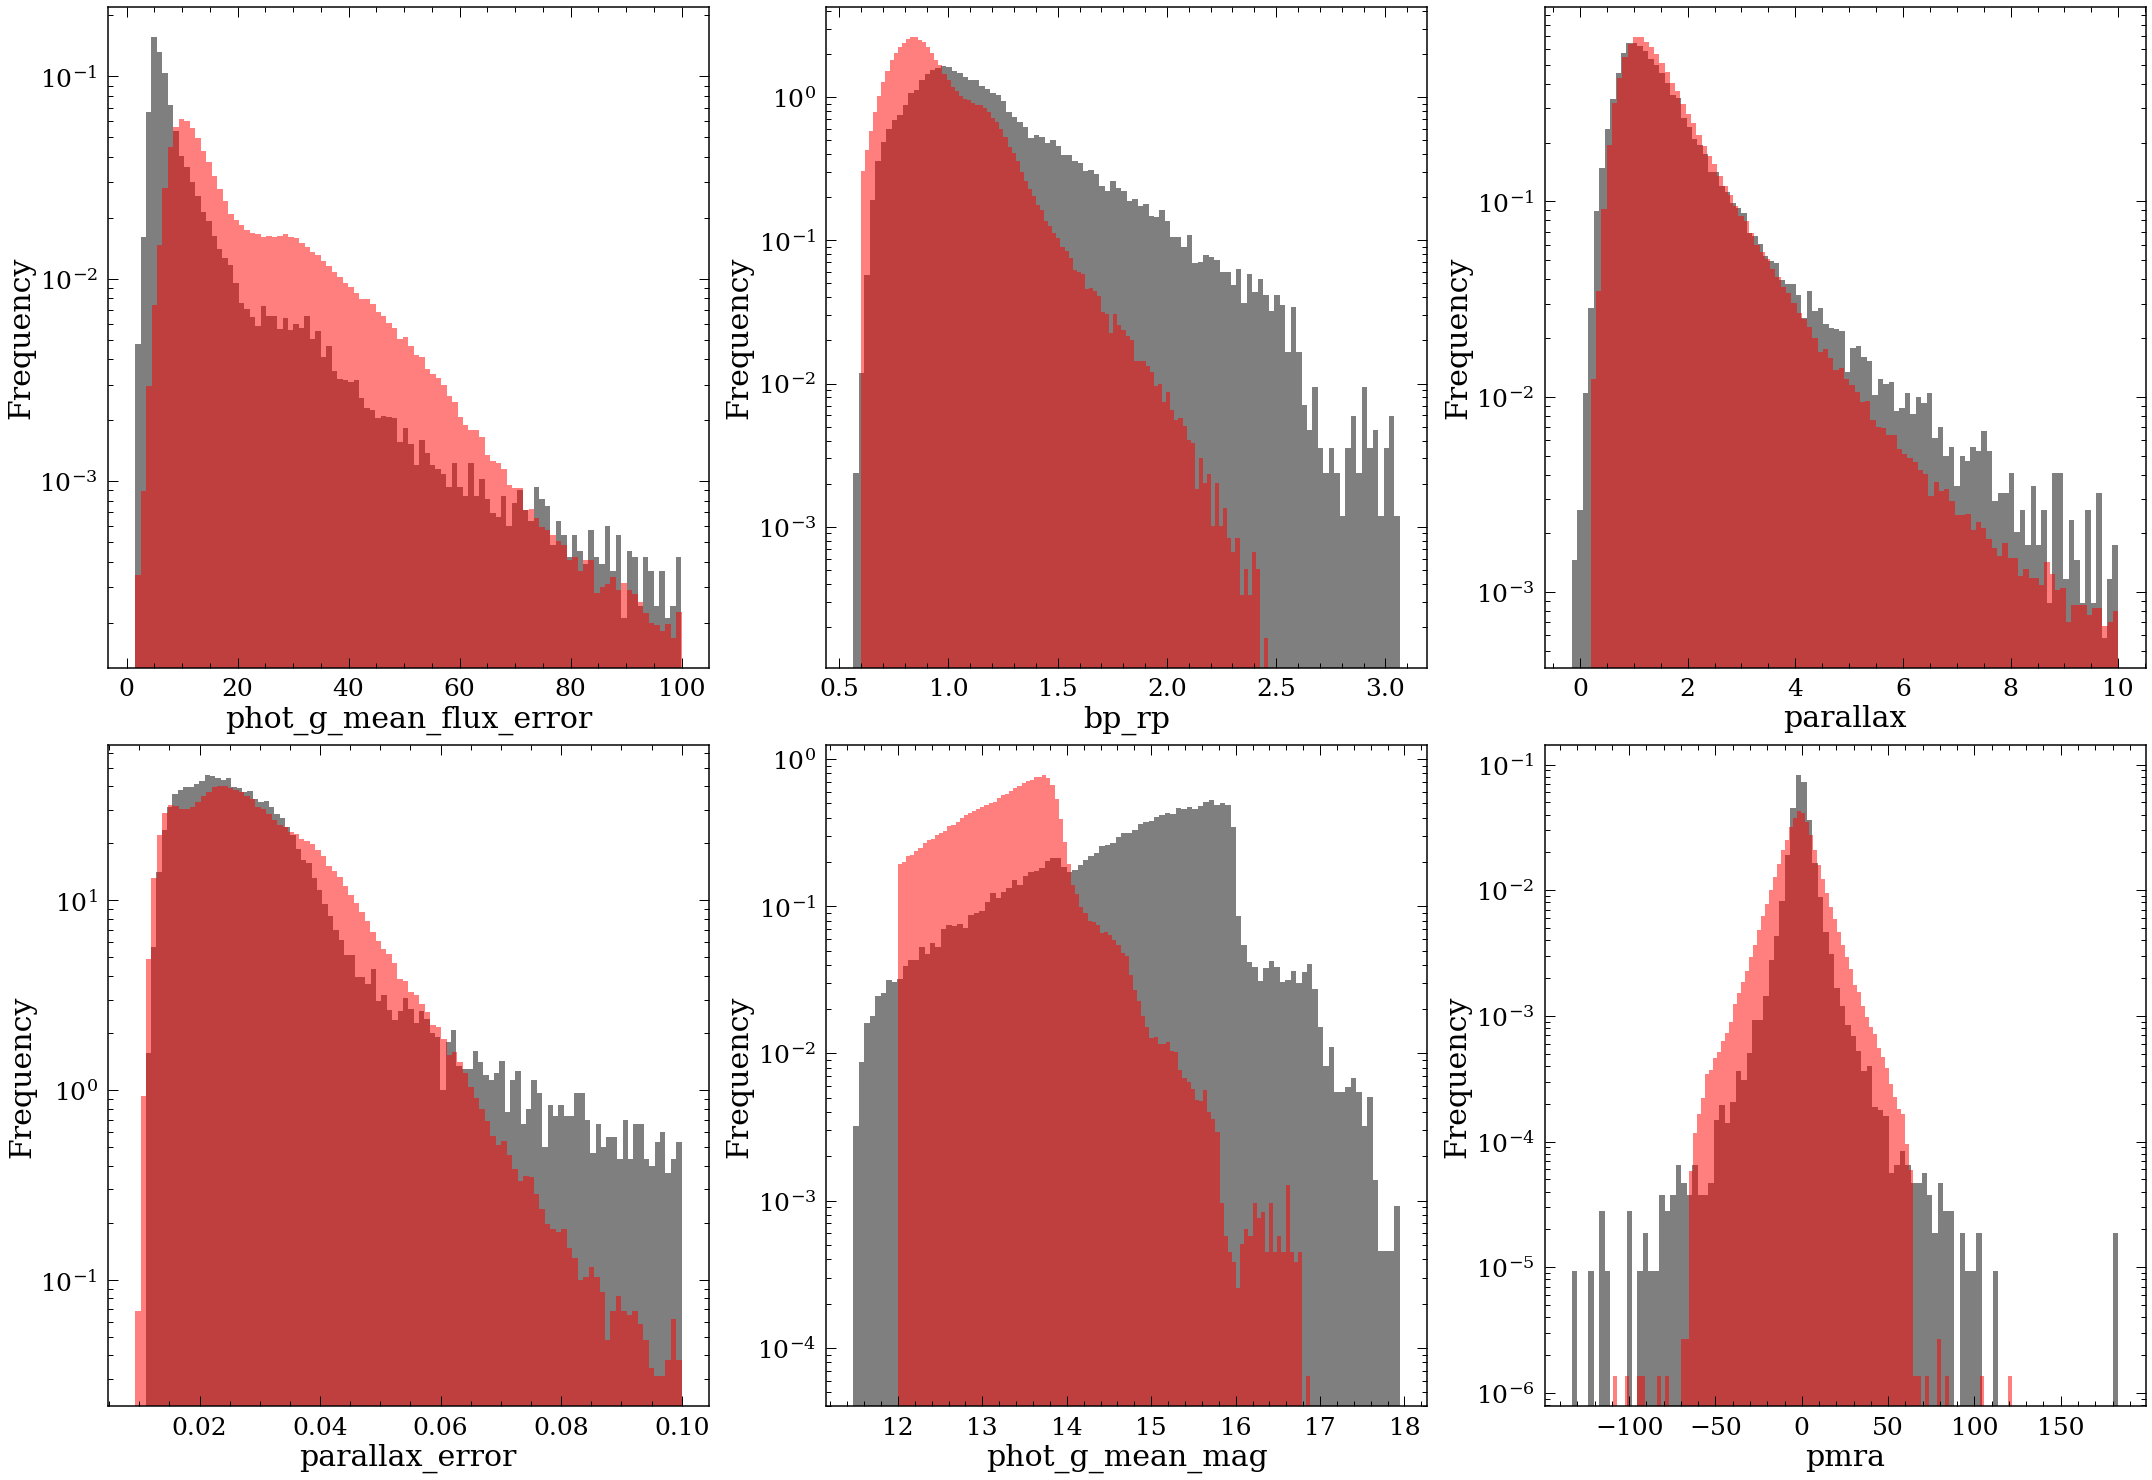

In [106]:
galah_feat=galah_feat.loc[galah_feat['parallax']<10].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['parallax']>0.2].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['parallax_error']<0.1].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['phot_g_mean_mag']>12].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['phot_g_mean_mag']<17].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['bp_rp']>0.6].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['bp_rp']<2.5].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['phot_g_mean_flux_error']<100].reset_index(drop=True)

titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100,alpha=0.5,density=True)
    plt.hist(galah_feat[features[i-1]],color='r',bins=100,alpha=0.5,density=True)
    plt.yscale('log')
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()

In [107]:
galah_feat['Prot_predict']=regr.predict(galah_feat[regr_outs['actrualF']])


(0, 50)

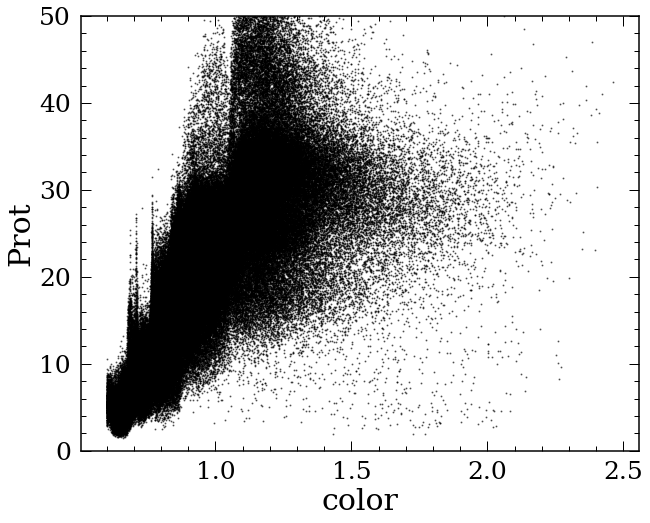

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(galah_feat['bp_rp'],galah_feat['Prot_predict'],s=1,alpha=0.5,c='k')
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
#plt.gca().invert_xaxis()



In [109]:
galah_age=readfits('Data/GALAH_DR3_VAC_ages_v1.fits')

In [172]:
galah_all=pd.merge(galah_age[['sobject_id','age_bstep','e_age_bstep']],galah_feat,
                   left_on='sobject_id',right_on='sobject_id',how='inner')


In [173]:
solarstars=galah_all.loc[abs(galah_all['fe_h'])<0.05].reset_index(drop=True)
#solarstars=solarstars.loc[abs(solarstars['teff']-6000)<50]

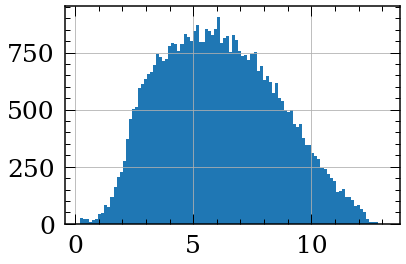

In [174]:
solarstars=solarstars.loc[solarstars['age_bstep']>0.2].reset_index(drop=True)
solarstars['age_bstep'].hist(bins=100)

In [175]:
solarstars=solarstars.loc[solarstars['e_age_bstep']<3].reset_index(drop=True)
np.shape(solarstars)

(36473, 276)

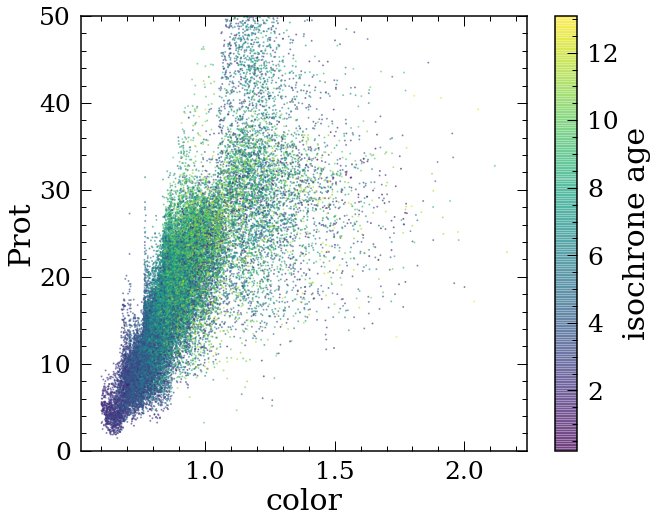

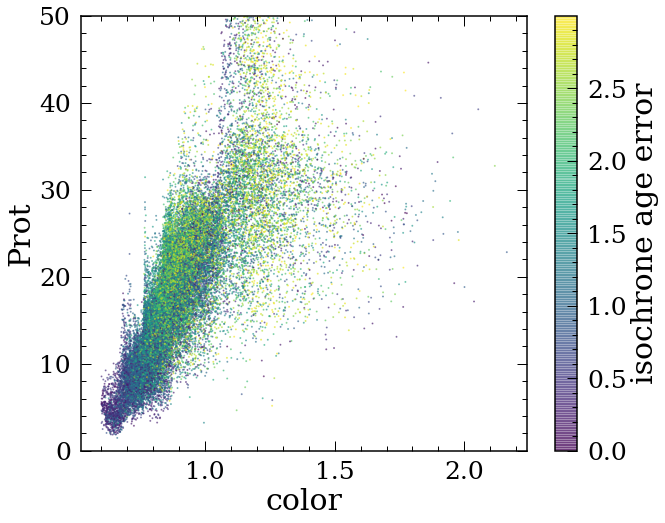

In [185]:
plt.figure(figsize=(10,8))
plt.scatter(solarstars['bp_rp'],solarstars['Prot_predict'],s=1,alpha=0.5,c=solarstars['age_bstep'])
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('isochrone age')

plt.figure(figsize=(10,8))
plt.scatter(solarstars['bp_rp'],solarstars['Prot_predict'],s=1,alpha=0.5,c=solarstars['e_age_bstep'])
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('isochrone age error')

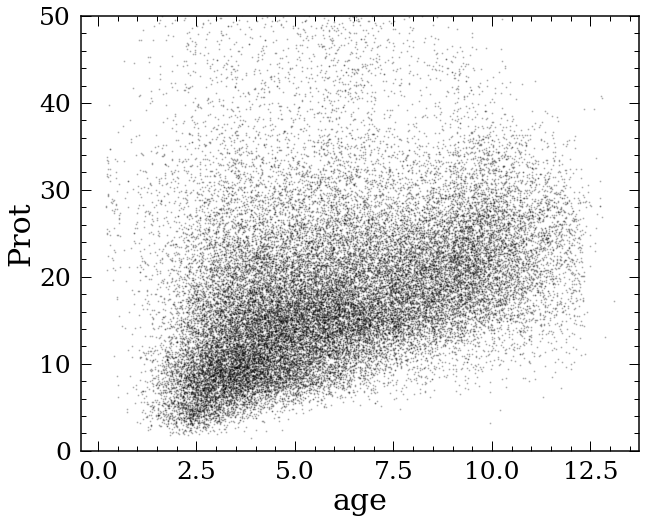

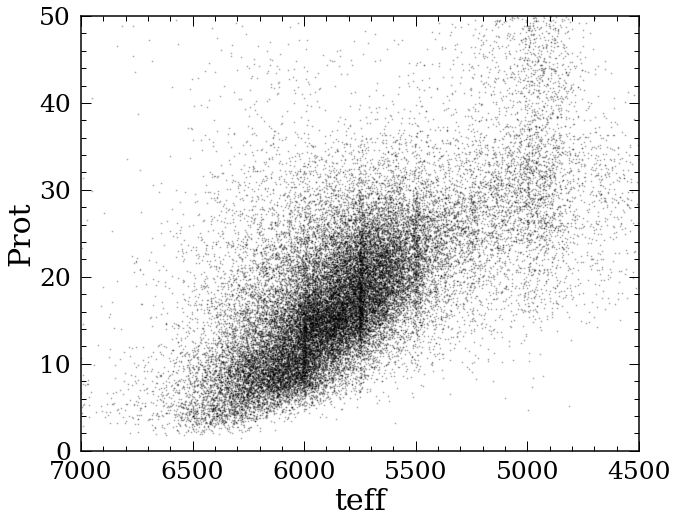

In [215]:

plt.figure(figsize=(10,8))
plt.scatter(solarstars['age_bstep'],solarstars['Prot_predict'],s=1,alpha=0.2,c='k')
plt.xlabel('age')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])



plt.figure(figsize=(10,8))
plt.scatter(solarstars['teff'],solarstars['Prot_predict'],s=1,alpha=0.2,c='k')
plt.xlabel('teff')
plt.ylabel('Prot')
plt.xlim([4500,7000])
plt.ylim([0,50])
plt.gca().invert_xaxis()



# calcualte intrinsic dispersion vs prot

In [189]:
def plotdiag(element):
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('viridis',10)
    plt.scatter(solarstars['age_bstep'],solarstars[element+'_fe'],s=1,c=solarstars['Prot_predict'],
                cmap=cm,alpha=0.5,vmin=0,vmax=30)
    cb=plt.colorbar()
    cb.set_label('Predicted periods [days]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel('['+element+'/Fe]')

    protselect=[0,5,10,15,20,25,30,40,60]
    cm = plt.cm.get_cmap('viridis',10)
    
    # all seperated by periods
    plt.figure(figsize=(10*(len(protselect)),10))
    for i in range(1,len(protselect)):
        plt.subplot(1,len(protselect),i)
        m=(solarstars['Prot_predict']>protselect[i-1]) & (solarstars['Prot_predict']<protselect[i])

        plt.scatter(solarstars['age_bstep'][m],solarstars[element+'_fe'][m],
                s=1,c=solarstars['Prot_predict'][m],cmap=cm,alpha=0.5,vmin=0,vmax=30)
        cb=plt.colorbar()
        cb.set_label('Predicted periods [days]')
        plt.xlabel('Age [Gyr]')
        plt.ylabel('['+element+'/Fe]')
        plt.title('%d < Prot < %d'%(protselect[i-1],protselect[i]),fontsize=25)
    return 1
        

In [191]:
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['age_bstep',name,'e_age_bstep','e_'+name])
    
    p=fitpoints(df_dropna['age_bstep'].values,df_dropna[name].values)
    
    totdisp=np.mean((df_dropna[name]-p(df_dropna['age_bstep']))**2.)
    meadisp=calc_measure_disp(df,name,p)
    intdisp=np.sqrt(totdisp-meadisp)
    return np.sqrt(totdisp),intdisp


def calc_measure_disp(df,name,p):
    trytime=50
    agedisp=[]
    
    x,xerr=df['age_bstep'].values,df['e_age_bstep'].values
    y,yerr=df[name].values,df['e_'+name].values
    
    for i in trange(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        df['newmed']=p(df['newage'])
            
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
            
            
    return np.std(np.array(agedisp))**2.


In [196]:
import random

def calcdisp_prot(element,protselect):

    disps=np.zeros(len(protselect)-1)
    totdisp=np.zeros(len(protselect)-1)
    nostar=np.zeros(len(protselect)-1)
    meanprot=np.zeros(len(protselect)-1)


    for i in trange(len(protselect)-1):
        m=(solarstars['Prot_predict']>protselect[i]) & (solarstars['Prot_predict']<protselect[i+1])
        nostar[i]=(sum(m))
    
    starpick=min(nostar)

    for i in trange(len(protselect)-1):
        m=(solarstars['Prot_predict']>protselect[i]) & (solarstars['Prot_predict']<protselect[i+1])
        df=solarstars[m].reset_index(drop=True)
    
        ind=range(len(df))
        picked=random.sample(ind, int(starpick))
        df=df.iloc[picked].reset_index(drop=True)
    
        totdisp[i],disps[i]=calc_disp(df,'Mg_fe')
        nostar[i]=(len(df))
        meanprot[i]=(protselect[i]+protselect[i+1])/2
    return meanprot,disps,starpick
    

### Check Temp dependence

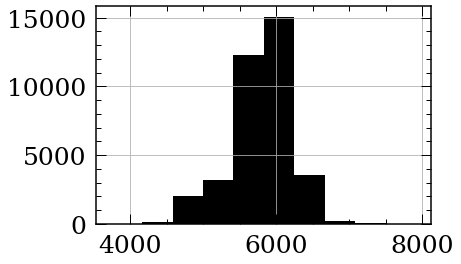

In [204]:
solarstars['teff'].hist(color='k')

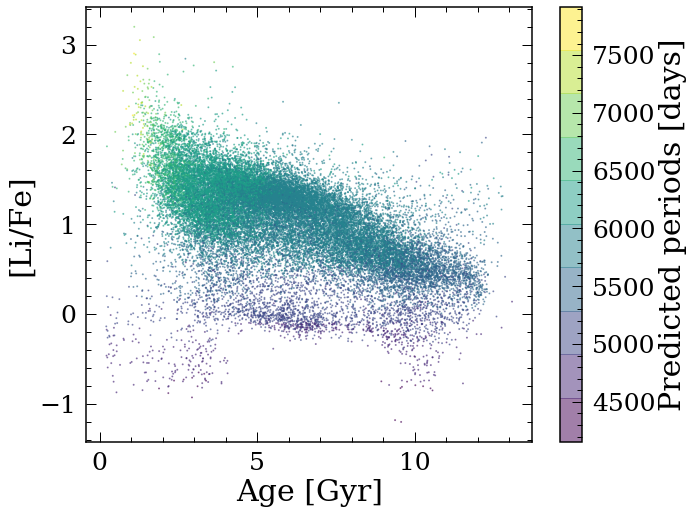

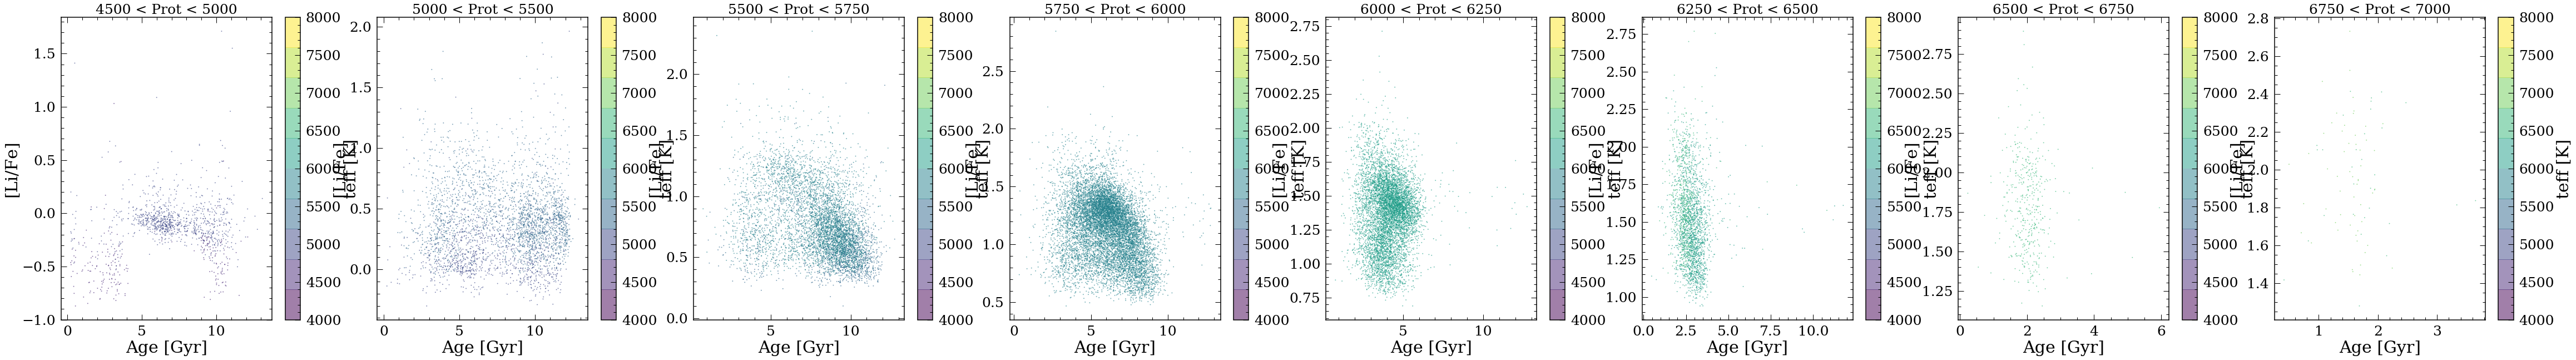

In [208]:
element='Li'
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(solarstars['age_bstep'],solarstars[element+'_fe'],s=1,c=solarstars['teff'],cmap=cm,alpha=0.5)
cb=plt.colorbar()
cb.set_label('Predicted periods [days]')
plt.xlabel('Age [Gyr]')
plt.ylabel('['+element+'/Fe]')

protselect=[4500,5000,5500,5750,6000,6250,6500,6750,7000]
cm = plt.cm.get_cmap('viridis',10)
    
# all seperated by periods
plt.figure(figsize=(10*(len(protselect)),10))
for i in range(1,len(protselect)):
    plt.subplot(1,len(protselect),i)
    m=(solarstars['teff']>protselect[i-1]) & (solarstars['teff']<protselect[i])

    plt.scatter(solarstars['age_bstep'][m],solarstars[element+'_fe'][m],
                s=1,c=solarstars['teff'][m],cmap=cm,alpha=0.5,vmin=4000,vmax=8000)
    cb=plt.colorbar()
    cb.set_label('teff [K]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel('['+element+'/Fe]')
    plt.title('%d < Prot < %d'%(protselect[i-1],protselect[i]),fontsize=25)

### plot everything for Mg

1

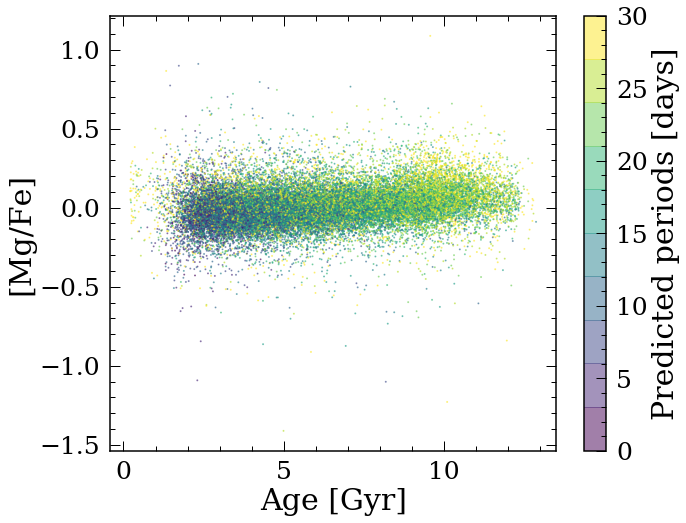

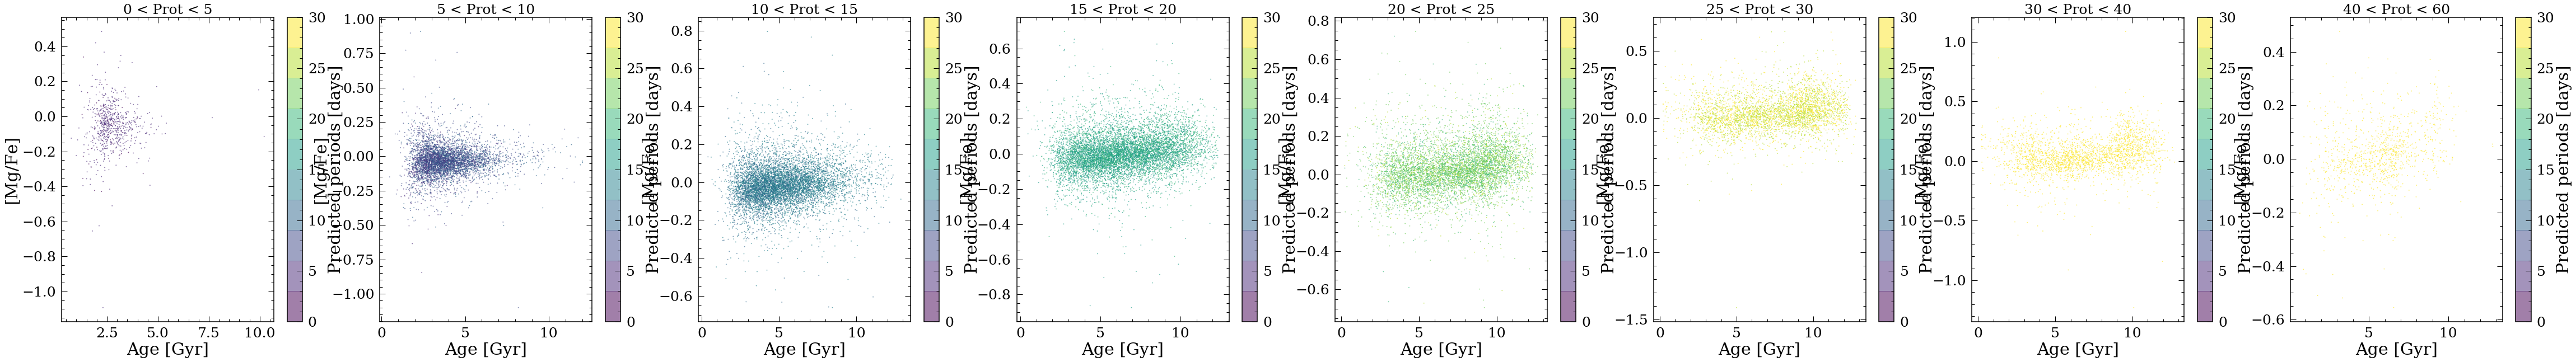

In [205]:
plotdiag('Mg')

In [206]:
protselect=np.linspace(5,30,10)
meanprot,disps,starpick=calcdisp_prot('Mg',protselect)





100%|██████████| 9/9 [00:00<00:00, 194.63it/s]


  0%|          | 0/9 [00:00<?, ?it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


  6%|▌         | 3/50 [00:00<00:01, 28.16it/s]


 14%|█▍        | 7/50 [00:00<00:01, 29.70it/s]


 22%|██▏       | 11/50 [00:00<00:01, 31.03it/s]


 28%|██▊       | 14/50 [00:00<00:01, 30.45it/s]


 34%|███▍      | 17/50 [00:00<00:01, 30.29it/s]


 40%|████      | 20/50 [00:00<00:01, 29.49it/s]


 46%|████▌     | 23/50 [00:00<00:00, 28.68it/s]


 52%|█████▏    | 26/50 [00:00<00:00, 28.45it/s]


 58%|█████▊    | 29/50 [00:00<00:00, 28.06it/s]


 64%|██████▍   | 32/50 [00:01<00:00, 28.22it/s]


 72%|███████▏  | 36/50 [00:01<00:00, 30.00it/s]


 80%|████████  | 40/50 [00:01<00:00, 31.05it/s]


 88%|████████▊ | 44/50 [00:01<00:00, 30.13it/s]


100%|██████████| 50/50 [00:01<00:00, 30.74it/s]


 11%|█         | 1/9 [00:01<00:13,  1.68s/it]


  0%|          | 0/50 [00:00<?, ?it/s]


  8%|▊         | 4/50 [00:00<00:01, 38.96it/s]


 16%|█▌        | 8/50 [00:00<00:

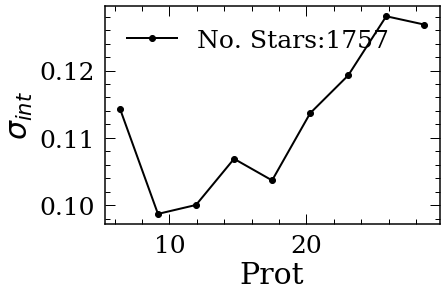

In [207]:
plt.figure()
plt.plot(meanprot,disps,'k-o',label='No. Stars:'+str(int(starpick)))
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()

### plot everything for Li

1

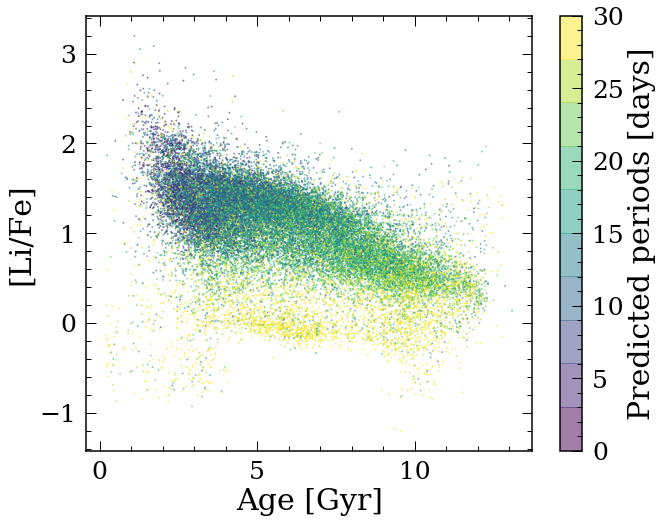

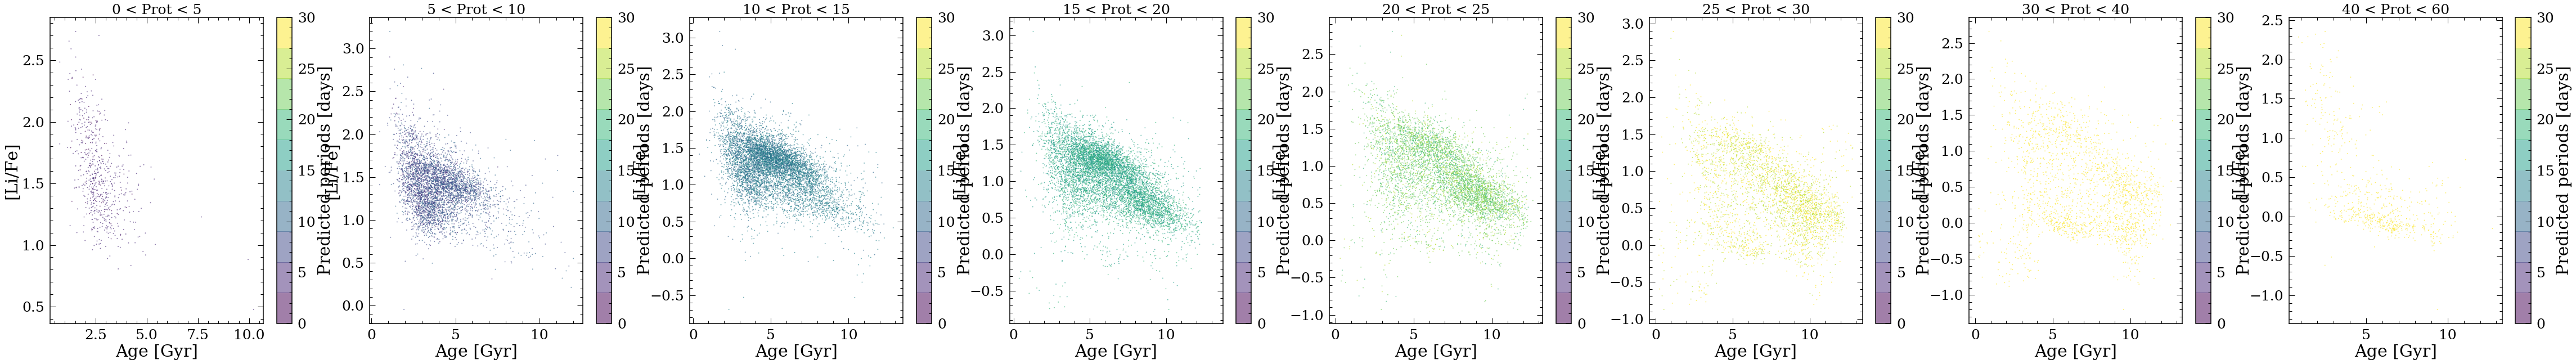

In [209]:
plotdiag('Li')

In [210]:
protselect=np.linspace(5,30,10)
meanprot,disps,starpick=calcdisp_prot('Li',protselect)






100%|██████████| 9/9 [00:00<00:00, 184.48it/s]


  0%|          | 0/9 [00:00<?, ?it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


  6%|▌         | 3/50 [00:00<00:01, 28.19it/s]


 16%|█▌        | 8/50 [00:00<00:01, 32.12it/s]


 24%|██▍       | 12/50 [00:00<00:01, 32.68it/s]


 32%|███▏      | 16/50 [00:00<00:01, 33.91it/s]


 42%|████▏     | 21/50 [00:00<00:00, 36.06it/s]


 50%|█████     | 25/50 [00:00<00:00, 33.88it/s]


 58%|█████▊    | 29/50 [00:00<00:00, 29.46it/s]


 68%|██████▊   | 34/50 [00:00<00:00, 33.09it/s]


 78%|███████▊  | 39/50 [00:01<00:00, 36.37it/s]


 88%|████████▊ | 44/50 [00:01<00:00, 38.90it/s]


100%|██████████| 50/50 [00:01<00:00, 37.81it/s]


 11%|█         | 1/9 [00:01<00:10,  1.36s/it]


  0%|          | 0/50 [00:00<?, ?it/s]


  8%|▊         | 4/50 [00:00<00:01, 36.90it/s]


 16%|█▌        | 8/50 [00:00<00:01, 36.50it/s]


 24%|██▍       | 12/50 [00:00<00:01, 35.98it/s]


 34%|███▍      | 17/50 [00:00<00:00, 38.98it/s]


 42%|████▏     | 21/50 [00:00<00:

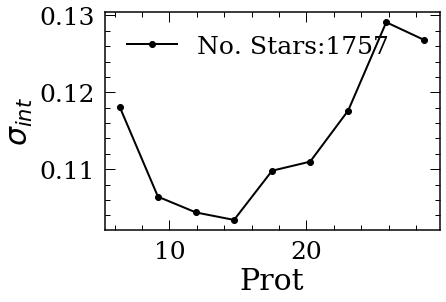

In [211]:
plt.figure()
plt.plot(meanprot,disps,'k-o',label='No. Stars:'+str(int(starpick)))
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()